In [1]:
# Import libraries
from pandas import read_csv
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
Cocacola = pd.read_excel('D:/DS Assignments/Forecasting/CocaCola_Sales_Rawdata.xlsx',header=0, index_col=0, parse_dates=True)

In [3]:
Cocacola.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


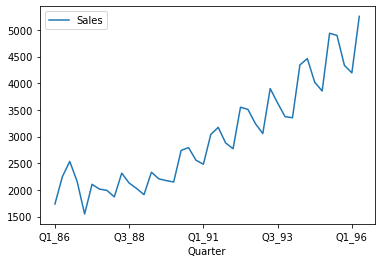

In [4]:
# line plot of time series
from matplotlib import pyplot
Cocacola.plot()
pyplot.show()

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

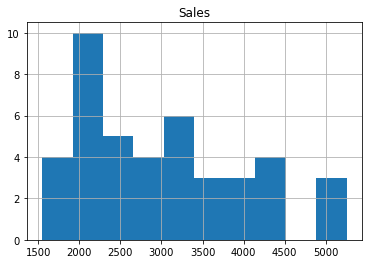

In [5]:
Cocacola.hist()

<AxesSubplot:ylabel='Density'>

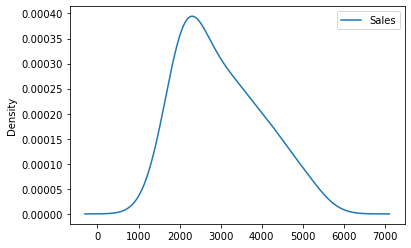

In [6]:
Cocacola.plot(kind='kde')

In [67]:
# separate out a validation dataset
split_point = len(Cocacola) - 15
dataset1, validation1 = Cocacola[0:split_point], Cocacola[split_point:]
print('Dataset1 %d, Validation1 %d' % (len(dataset1), len(validation1)))
dataset1.to_excel('dataset1.xlsx', header=False)
validation1.to_excel('validation1.xlsx', header=False)

Dataset1 27, Validation1 15


In [68]:
#### Persistence/ Base model

In [69]:
# evaluate a persistence model
from pandas import read_excel
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_excel('dataset1.xlsx', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [70]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=1910.604, Expected=2331.165
>Predicted=2331.165, Expected=2206.550
>Predicted=2206.550, Expected=2173.968
>Predicted=2173.968, Expected=2148.278
>Predicted=2148.278, Expected=2739.308
>Predicted=2739.308, Expected=2792.754
>Predicted=2792.754, Expected=2556.010
>Predicted=2556.010, Expected=2480.974
>Predicted=2480.974, Expected=3039.523
>Predicted=3039.523, Expected=3172.116
>Predicted=3172.116, Expected=2879.001
>Predicted=2879.001, Expected=2772.000
>Predicted=2772.000, Expected=3550.000
>Predicted=3550.000, Expected=3508.000
RMSE: 342.464


In [71]:
#### ARIMA Hyperparameters

In [72]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_excel
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.60)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [73]:
#Grid Search for p,d,q values

In [74]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset1, p_values, d_values, q_values):
    dataset1 = dataset1.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [75]:
# load dataset
train = read_excel('dataset1.xlsx', header=None, index_col=0, parse_dates=True, squeeze=True)
#evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=749.766
ARIMA(0, 0, 1) RMSE=569.070
ARIMA(0, 0, 2) RMSE=469.600
ARIMA(0, 1, 0) RMSE=357.588
ARIMA(0, 1, 1) RMSE=411.842
ARIMA(0, 1, 2) RMSE=362.776
ARIMA(0, 1, 3) RMSE=347.068
ARIMA(0, 1, 4) RMSE=304.122
ARIMA(0, 2, 0) RMSE=539.009
ARIMA(0, 2, 1) RMSE=381.656
ARIMA(0, 2, 2) RMSE=304.473
ARIMA(0, 2, 3) RMSE=300.675
ARIMA(1, 0, 0) RMSE=485.109
ARIMA(1, 1, 0) RMSE=358.009
ARIMA(1, 2, 0) RMSE=522.836
ARIMA(2, 0, 0) RMSE=516.349
ARIMA(2, 1, 0) RMSE=285.178
ARIMA(2, 2, 0) RMSE=443.718
ARIMA(3, 0, 0) RMSE=453.775
ARIMA(3, 1, 0) RMSE=265.590
ARIMA(3, 2, 0) RMSE=164.042
ARIMA(4, 0, 0) RMSE=383.135
ARIMA(4, 1, 0) RMSE=180.180
ARIMA(4, 2, 0) RMSE=168.353
Best ARIMA(3, 2, 0) RMSE=164.042


In [76]:
#### Build Model based on the optimized values

In [77]:
# save finalized model to file
from pandas import read_excel
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [78]:
# load data
train = read_excel('dataset1.xlsx', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

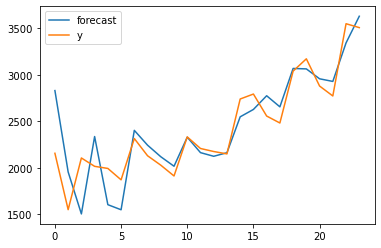

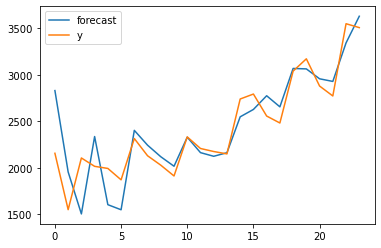

In [86]:
# fit model
model = ARIMA(X, order=(3,2,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=15)[0]
model_fit.plot_predict()

In [87]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   24
Model:                 ARIMA(3, 2, 0)   Log Likelihood                -161.743
Method:                       css-mle   S.D. of innovations            177.448
Date:                Tue, 24 Aug 2021   AIC                            333.487
Time:                        18:15:45   BIC                            339.377
Sample:                             2   HQIC                           335.050
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3640      9.697      0.759      0.448     -11.641      26.369
ar.L1.D2.y    -1.0398      0.086    -12.148      0.000      -1.208      -0.872
ar.L2.D2.y    -1.0606      0.075    -14.113      0.0

In [88]:
#Error on the test data
val=pd.read_excel('validation1.xlsx',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

576.8546985666691

In [89]:
#### Combine train and test data and build final model

In [90]:
# fit model
data = read_excel('D:/DS Assignments/Forecasting/CocaCola_Sales_Rawdata.xlsx', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [91]:
model = ARIMA(X, order=(4,2,0))
model_fit = model.fit()

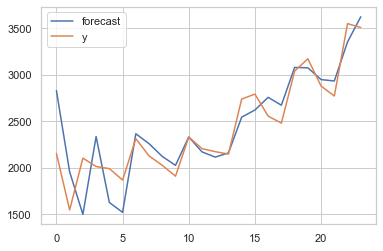

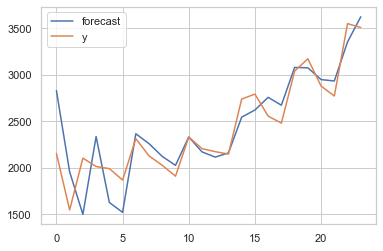

In [106]:
forecast=model_fit.forecast(steps=15)[0]
model_fit.plot_predict()

In [107]:
forecast

array([3247.37666112, 3301.34292205, 4037.33646143, 3972.89807851,
       3755.02492274, 3949.44309513, 4639.4466044 , 4557.87981308,
       4401.09843645, 4715.12990476, 5356.35341329, 5265.83110661,
       5183.59924882, 5597.39597624, 6188.57543242])

# PACF

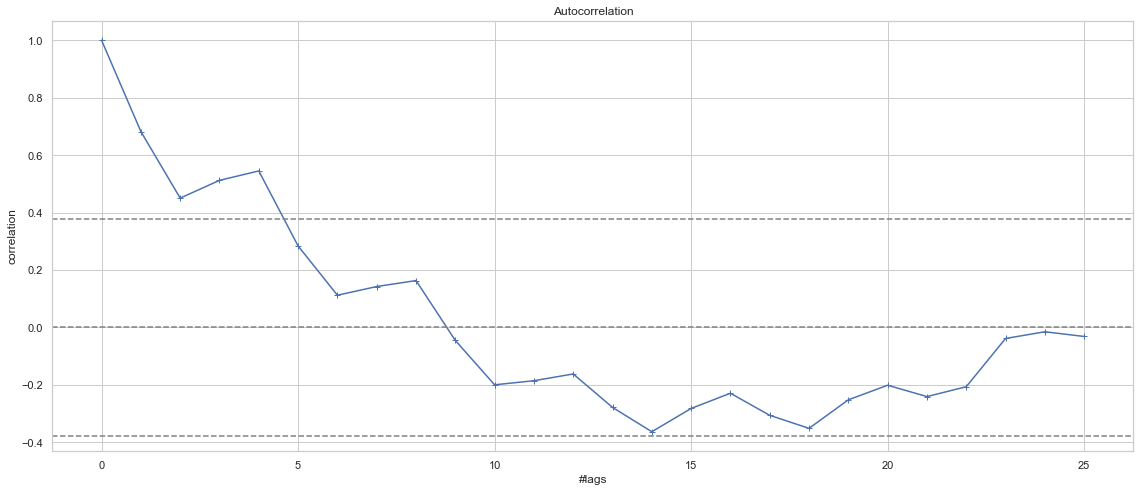

In [109]:
#calling auto correlation function
ACF_lag= acf(X, nlags=200)



#Plot PACF:
plt.figure(figsize=(16, 7))
plt.plot(ACF_lag,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.title('Autocorrelation')
plt.xlabel('#lags')
plt.ylabel('correlation')
plt.tight_layout()


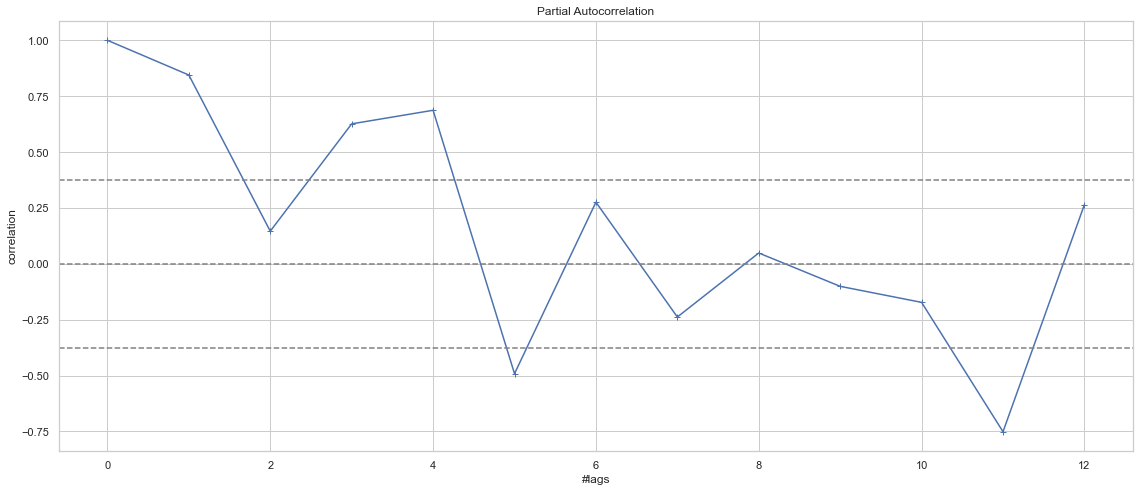

In [114]:
#calling partial correlation function
PACF_lag = pacf(X, nlags=12, method='ols')

#Plot PACF:
plt.figure(figsize=(16, 7))
plt.plot(PACF_lag,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation')
plt.xlabel('#lags')
plt.ylabel('correlation')
plt.tight_layout()